In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc


In [ ]:
# Reading the dataset
df= pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [184]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Dropping unnecessary columns
df= df.drop(["id","Unnamed: 32"],axis=1)

In [186]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Replacing categorical values with numerical values
df= df.replace({'diagnosis':{'M':1,'B':0}})

C:\Users\mayan\AppData\Local\Temp\ipykernel_2404\3628830268.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace({'diagnosis':{'M':1,'B':0}})


Maligent: 1

Benign: 0

<Axes: xlabel='diagnosis', ylabel='count'>

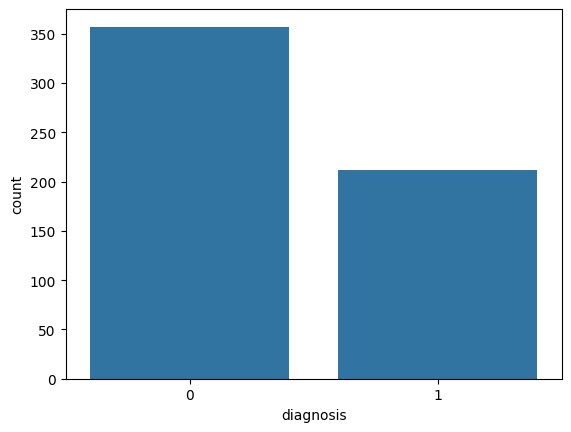

In [ ]:
# Visualizing the distribution of the target variable
sns.countplot(x='diagnosis', data=df)

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

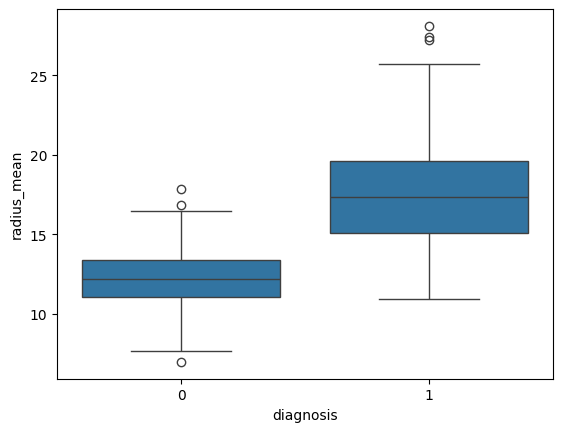

In [ ]:
# Visualizing the distribution of a feature with respect to the target variable for finding outliers.
sns.boxplot(x='diagnosis', y='radius_mean', data=df)


<Axes: >

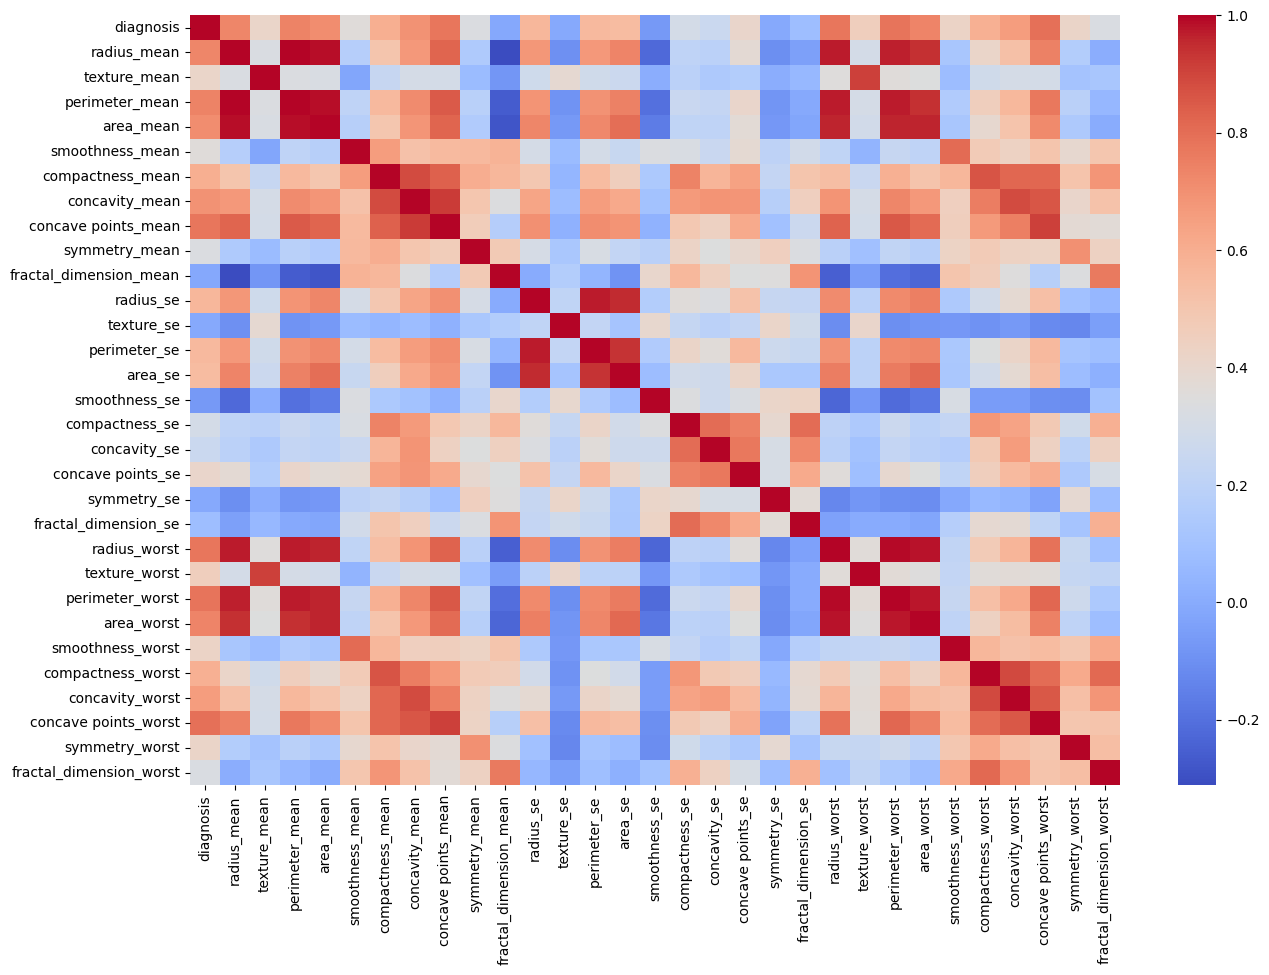

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="coolwarm")


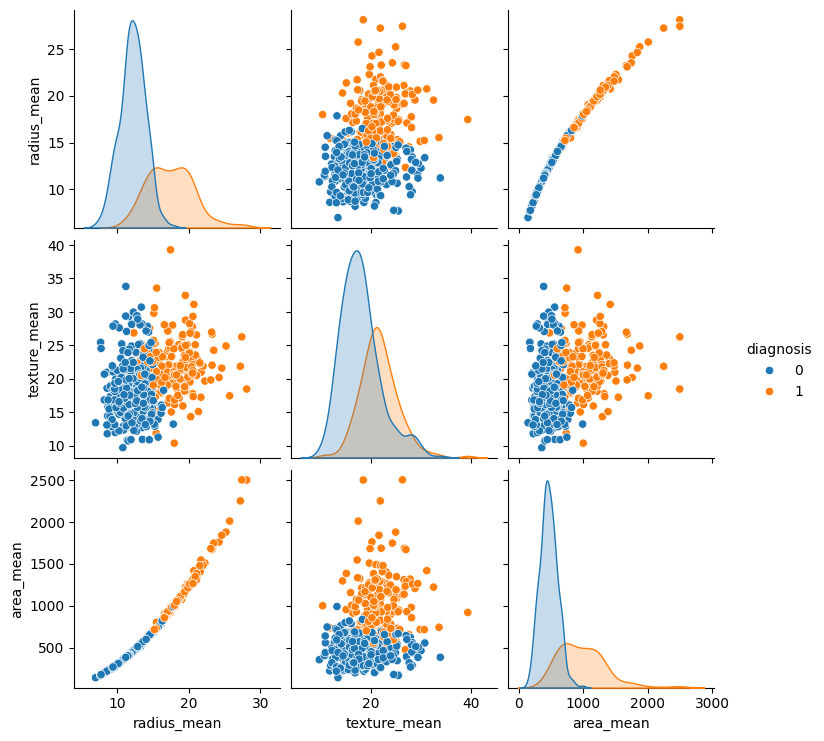

In [ ]:
# Pairplot to see the distribution of features with respect to target variable
sns.pairplot(df[['diagnosis','radius_mean','texture_mean','area_mean']], hue='diagnosis')


In [ ]:
# Splitting the dataset into training and testing sets
X= df.drop('diagnosis', axis=1)
y= df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict_proba(X_test)[ :,1]

# Custom thresholding
threshold = 0.3
y_pred_custom = (y_pred >= threshold).astype(int)

# Evaluating the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_custom))


✅ Accuracy: 0.9649122807017544

✅ Confusion Matrix:
 [[103   5]
 [  1  62]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [ ]:
# Evaluating the model with given inputs
new_input = [
    # Likely Benign
    [13.5, 14.2, 90.0, 500.0, 0.08, 0.09, 0.07, 0.06, 0.15, 0.05,
     0.4, 1.0, 3.2, 42.0, 0.006, 0.015, 0.017, 0.010, 0.018, 0.003,
     16.0, 20.5, 110.0, 720.0, 0.12, 0.25, 0.26, 0.11, 0.30, 0.07]]


new_input_scaled = scaler.transform(new_input)
proba_malignant= model.predict_proba(new_input_scaled)[0][1]
prob_benign = model.predict_proba(new_input_scaled)[0][0]
prediction = 1 if proba_malignant >= threshold else 0

proba_malignant_percent = round(proba_malignant*100,2)
proba_benign_percent = round(prob_benign*100,2)

# Displaying the results
if prediction == 0:
    print("🟢 Tumor is likely Benign")
    print("Probability (Benign):",proba_benign_percent,"%")

else:
    print("🔴 Tumor is likely Malignant")
    print("Probability (Malignant):",proba_malignant_percent,"%")


🟢 Tumor is likely Benign
Probability (Benign): 80.91 %


c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


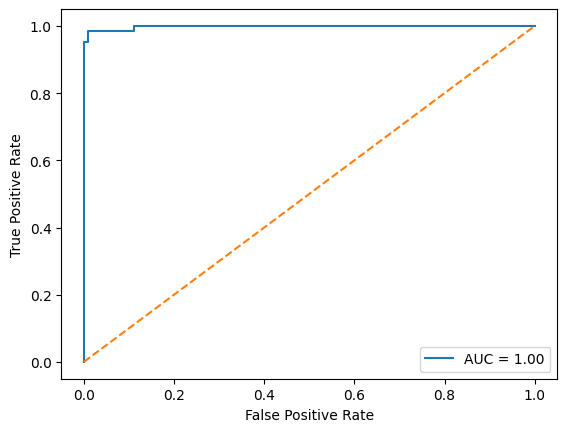

In [ ]:
# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()